In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_data = pd.read_csv('salesdata.csv', header=None)
sales_data.head()


,0,1,2,3,4,5
0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,NaN,NaN,NaN,NaN,NaN,NaN
3,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
4,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
sales_data.shape

(18384, 6)

In [7]:
sales_data.describe()

,0,1,2,3,4,5
count,18325,18325,18325,18325,18325,18325
unique,17538,20,8,19,13584,17120
top,Order ID,Lightning Charging Cable,1,14.95,Order Date,Purchase Address
freq,36,2201,16558,2201,36,36


In [15]:
sales_data.isnull().sum()

0    59
1    59
2    59
3    59
4    59
5    59
dtype: int64

In [9]:
sales_data=sales_data.dropna(how='any')

In [10]:
sales_data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [11]:
sales_data.shape

(18325, 6)

In [16]:
print(sales_data.columns)



Index([0, 1, 2, 3, 4, 5], dtype='int64')


In [17]:
sales_data.columns = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']


In [18]:
print(sales_data.columns)


Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


In [19]:
sales_data['Revenue'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce') * pd.to_numeric(sales_data['Price Each'], errors='coerce')


In [23]:
total_revenue = sales_data['Revenue'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")


Total Revenue: $3396059.11


In [24]:
sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')


In [25]:
best_selling_products = sales_data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)


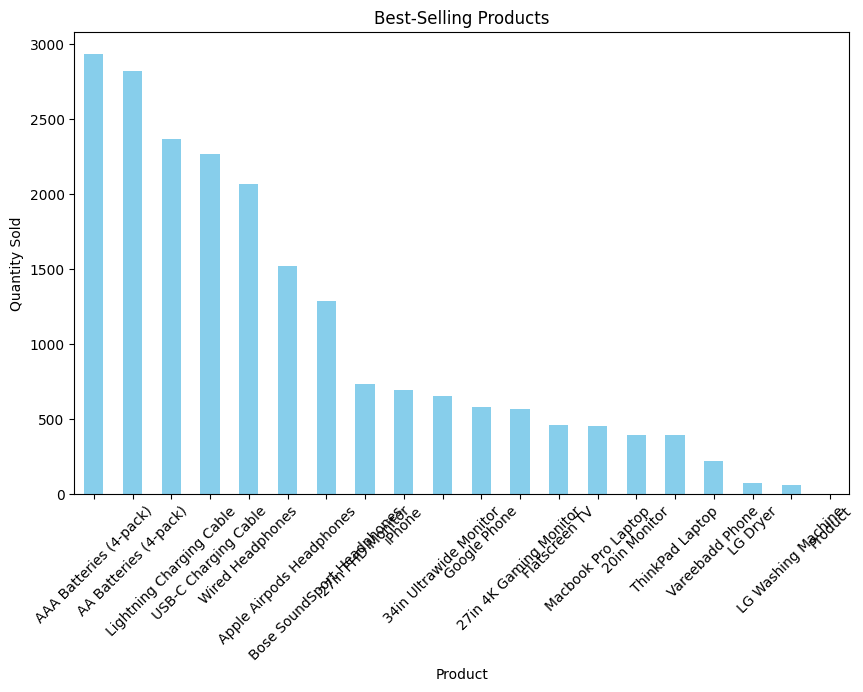

In [26]:
best_selling_products.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Best-Selling Products')
plt.ylabel('Quantity Sold')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.show()


1. Monthly Revenue Trend

In [31]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format='%Y-%m-%d', errors='coerce')
sales_data['Month'] = sales_data['Order Date'].dt.month

In [32]:
monthly_revenue = sales_data.groupby('Month')['Revenue'].sum()
print(monthly_revenue)


Month
4.0    3385499.82
5.0      10559.29
Name: Revenue, dtype: float64


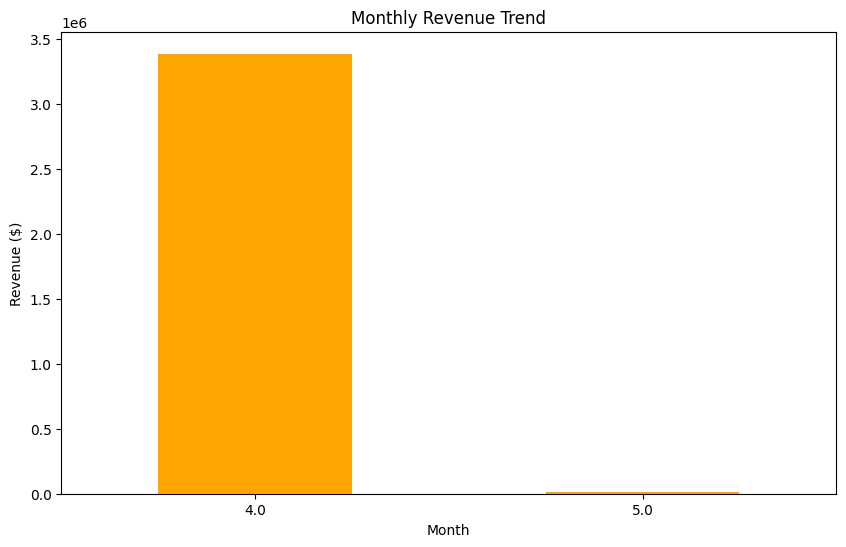

In [35]:
monthly_revenue.plot(kind='bar', figsize=(10, 6), color='orange', title='Monthly Revenue Trend')
plt.ylabel('Revenue ($)')
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.show()


2. Revenue by City

In [37]:
sales_data['City'] = sales_data['Purchase Address'].apply(
    lambda x: x.split(',')[1].strip() if isinstance(x, str) and len(x.split(',')) > 1 else ''
)


In [38]:
city_revenue = sales_data.groupby('City')['Revenue'].sum().sort_values(ascending=False)
print(city_revenue)


City
San Francisco    817074.77
Los Angeles      551399.07
New York City    446587.78
Boston           353880.16
Atlanta          284454.92
Seattle          276010.24
Dallas           252840.47
Portland         241128.11
Austin           172683.59
                      0.00
Name: Revenue, dtype: float64


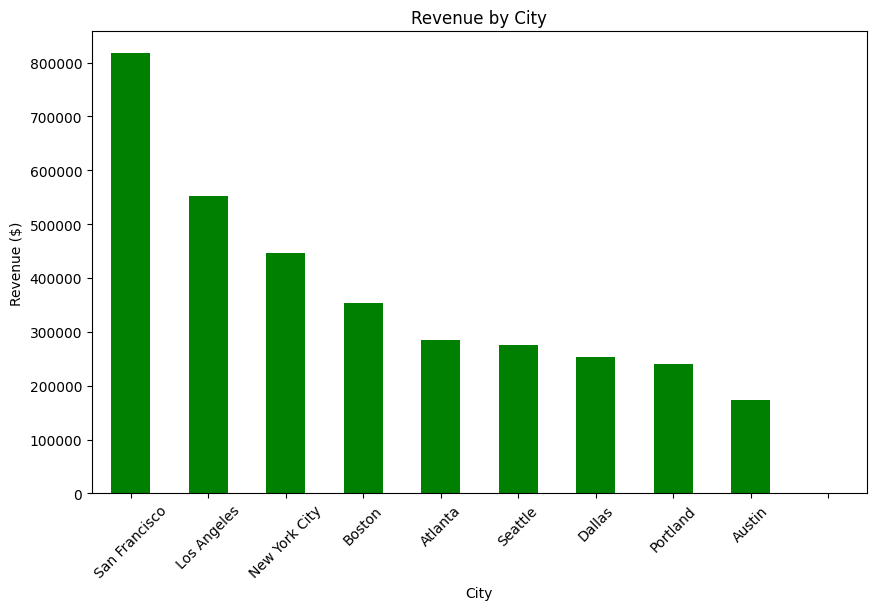

In [39]:
city_revenue.plot(kind='bar', figsize=(10, 6), color='green', title='Revenue by City')
plt.ylabel('Revenue ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


3. Sales by Hour

In [40]:
sales_data['Hour'] = sales_data['Order Date'].dt.hour


In [41]:
hourly_revenue = sales_data.groupby('Hour')['Revenue'].sum()
print(hourly_revenue)


Hour
0.0      74329.16
1.0      48011.05
2.0      22384.20
3.0      19552.22
4.0      18628.47
5.0      20514.55
6.0      41566.93
7.0      69842.11
8.0     114757.55
9.0     183024.64
10.0    204095.32
11.0    222818.47
12.0    237861.09
13.0    199236.62
14.0    209612.78
15.0    186359.97
16.0    189961.34
17.0    188467.56
18.0    222620.31
19.0    249265.71
20.0    217054.46
21.0    188516.21
22.0    159946.46
23.0    107631.93
Name: Revenue, dtype: float64


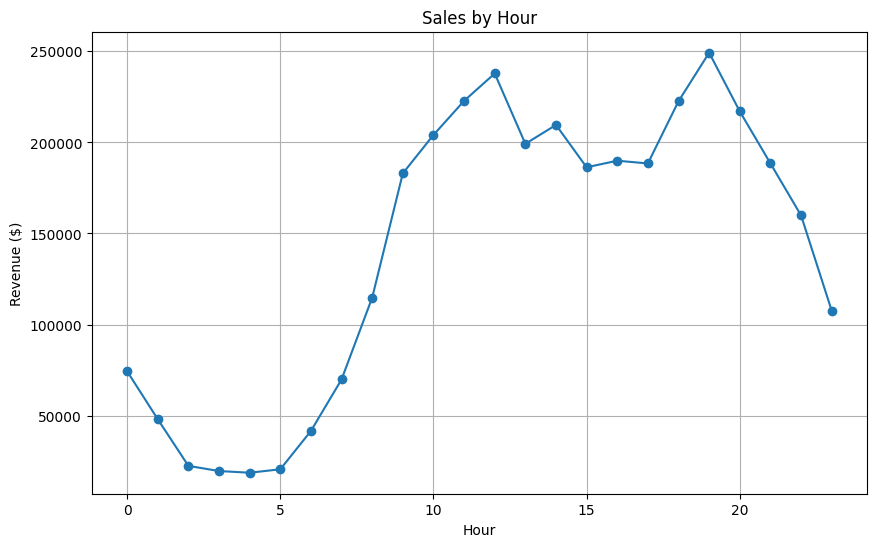

In [42]:
hourly_revenue.plot(kind='line', figsize=(10, 6), marker='o', title='Sales by Hour')
plt.ylabel('Revenue ($)')
plt.xlabel('Hour')
plt.grid()
plt.show()


4. Save the Cleaned Data

In [43]:
sales_data.to_csv('analyzed_sales_data.csv', index=False)
